In [3]:
import sys
sys.path.insert(0,'..')

import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from DL_project_utils import *

%load_ext autoreload
%autoreload 1
%aimport DL_project_utils


class Net1(nn.Module):
    def __init__(self, nb_hidden = 64):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(128, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        x = F.relu(self.fc1(x.view(-1, 128)))
        x = self.fc2(x)
        return x

class Net2(nn.Module):
    def __init__(self, nb_hidden = 256):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(1024, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 10)

    def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2, stride=2))
#         x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2, padding=1)
        x = F.relu(self.fc1(x.view(-1, 1024)))
        x = self.fc2(x)
        return x
    
class Net3(nn.Module):
    def __init__(self, nb_hidden = 64):
        super().__init__()
        self.conv1 = nn.Conv2d(2, 32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(256, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 2)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        x = F.relu(self.fc1(x.view(-1, 256)))
        x = self.fc2(x)
        return x


In [7]:
learning_rate, epochs, batch_size = 1e-1, 25, 10
train_loader, test_loader, test_target_loader = read_input(batch_size)
# train_loader, test_loader = read_input(batch_size, single_channel = False)
model = Net1()
tr_loss_l, val_loss_l, val_accuracy_l = train_model(model=model, train_dataset=train_loader,learning_rate=learning_rate,epochs=epochs)


Epoch: 1/25, Train Loss: 2.275307, Val Loss: 2.241265, Val Accuracy: 26.000000% 104/400

Epoch: 2/25, Train Loss: 2.189470, Val Loss: 2.099969, Val Accuracy: 57.000000% 228/400

Epoch: 3/25, Train Loss: 1.912729, Val Loss: 1.559326, Val Accuracy: 74.250000% 297/400

Epoch: 4/25, Train Loss: 1.377480, Val Loss: 1.149688, Val Accuracy: 68.000000% 272/400

Epoch: 5/25, Train Loss: 0.949096, Val Loss: 0.718743, Val Accuracy: 77.250000% 309/400

Epoch: 6/25, Train Loss: 0.744885, Val Loss: 0.528799, Val Accuracy: 83.750000% 335/400

Epoch: 7/25, Train Loss: 0.562546, Val Loss: 0.451503, Val Accuracy: 86.000000% 344/400

Epoch: 8/25, Train Loss: 0.425771, Val Loss: 0.395980, Val Accuracy: 86.500000% 346/400

Epoch: 9/25, Train Loss: 0.348223, Val Loss: 0.379037, Val Accuracy: 87.750000% 351/400

Epoch: 10/25, Train Loss: 0.299029, Val Loss: 0.382726, Val Accuracy: 86.500000% 346/400

Epoch: 11/25, Train Loss: 0.269548, Val Loss: 0.362789, Val Accuracy: 87.750000% 351/400

Epoch: 12/25, Trai

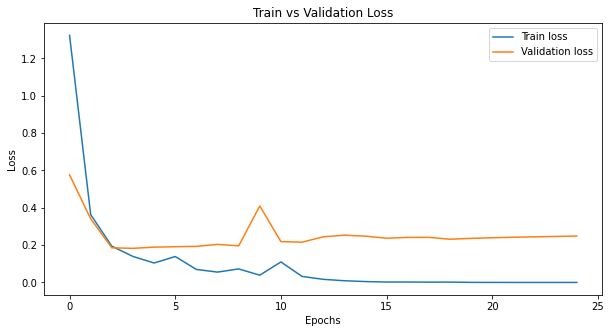

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.plot(tr_loss_l, label="Train loss")
plt.plot(val_loss_l, label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Train vs Validation Loss")
plt.legend(loc='upper right')
plt.show()

In [6]:
batch_size, learning_rate, epochs, rounds = 10, 1e-1, 20, 10
val_accuracy_list = predict_sc_accuracy(model, batch_size, learning_rate, epochs, rounds)


Round: 1/10, Val Accuracy: 97.899994% 979/1000

Round: 2/10, Val Accuracy: 97.899994% 979/1000

Round: 3/10, Val Accuracy: 98.199997% 982/1000

Round: 4/10, Val Accuracy: 97.000000% 970/1000

Round: 5/10, Val Accuracy: 98.400002% 984/1000

Round: 6/10, Val Accuracy: 98.099998% 981/1000

Round: 7/10, Val Accuracy: 98.099998% 981/1000

Round: 8/10, Val Accuracy: 98.199997% 982/1000

Round: 9/10, Val Accuracy: 98.500000% 985/1000

Round: 10/10, Val Accuracy: 98.000000% 980/1000


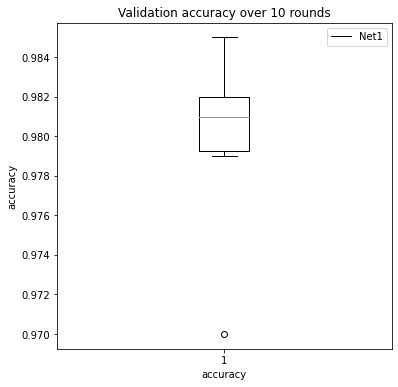

In [11]:
fig = plt.figure(figsize=(6, 6))
plt.boxplot([val_accuracy_list])
plt.xlabel('accuracy')
plt.ylabel('accuracy')
plt.title(f'Validation accuracy over {rounds} rounds')
plt.legend(['Net1'],loc='upper right')
plt.show()